In [18]:
# --- Celda 1: Importaciones y Configuración del Experimento ---

import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print("--- LIBRERÍAS IMPORTADAS Y CONFIGURACIÓN CARGADA ---")

# --- PARÁMETROS DEL EXPERIMENTO (¡MODIFICA ESTOS VALORES!) ---

# Directorio donde se encuentran los ejecutables compilados
EXECUTABLE_DIR = './bin'

# Archivo donde se guardarán los resultados del benchmark
OUTPUT_FILE = 'resultados_benchmark.csv'

# 1. TAMAÑOS DE MALLA A PROBAR (Divisiones en el eje M)
#    Se usarán mallas cuadradas (M=N)
MESH_SIZES_M = [10, 50, 100] 

# 2. HILOS A PROBAR
#    El script se encargará de usar solo 1 hilo para la versión serial.
THREAD_COUNTS = [1, 2, 4, 8, 16]

# Casos del problema a ejecutar (1 y 2)
CASES_TO_RUN = [1, 2] 

# Lista de todas las versiones que se probarán para rendimiento
VERSIONS_TO_BENCHMARK = [
    "poisson_serial",
    "poisson_parallel",
    "poisson_collapse",
    "poisson_sections",
    "poisson_sincronizacion",
    "poisson_schedule"
]

print("\n--- Configuración Actual ---")
print(f"Directorio de ejecutables: '{EXECUTABLE_DIR}'")
print(f"Archivo de salida: '{OUTPUT_FILE}'")
print(f"Mallas a probar (M x M): {MESH_SIZES_M}")
print(f"Hilos a probar: {THREAD_COUNTS}")
print(f"Versiones a testear: {VERSIONS_TO_BENCHMARK}")

--- LIBRERÍAS IMPORTADAS Y CONFIGURACIÓN CARGADA ---

--- Configuración Actual ---
Directorio de ejecutables: './bin'
Archivo de salida: 'resultados_benchmark.csv'
Mallas a probar (M x M): [10, 50, 100]
Hilos a probar: [1, 2, 4, 8, 16]
Versiones a testear: ['poisson_serial', 'poisson_parallel', 'poisson_collapse', 'poisson_sections', 'poisson_sincronizacion', 'poisson_schedule']


In [19]:
# --- Celda 2: Ejecución del Benchmark de Rendimiento ---

print(f"--- INICIANDO BENCHMARK DE RENDIMIENTO ---")
print(f"Los resultados se guardarán en: {OUTPUT_FILE}")
print("ADVERTENCIA: Este proceso puede tardar mucho tiempo. El kernel estará ocupado.")

# Abrir el archivo de salida y escribir la cabecera
try:
    with open(OUTPUT_FILE, 'w') as f:
        f.write("version,malla_M,malla_N,hilos,caso,schedule,tiempo\n")

        # Crear una lista total de tareas para la barra de progreso
        total_tasks = 0
        for m in MESH_SIZES_M:
            for case in CASES_TO_RUN:
                total_tasks += 1 # Para la versión serial
                total_tasks += (len(VERSIONS_TO_BENCHMARK) - 2) * len(THREAD_COUNTS) # -2 por serial y schedule
                total_tasks += len(THREAD_COUNTS) * 2 # Para la versión schedule

        progress_bar = tqdm(total=total_tasks, desc="Ejecutando Benchmarks")

        for version in VERSIONS_TO_BENCHMARK:
            for m in MESH_SIZES_M:
                n = m
                for case_id in CASES_TO_RUN:
                    if version == "poisson_schedule":
                        for threads in THREAD_COUNTS:
                            for sched_type in [1, 2]:
                                sched_name = "static" if sched_type == 1 else "dynamic"
                                progress_bar.set_description(f"Corriendo {version} M={m} H={threads} S={sched_name}")
                                cmd = [os.path.join(EXECUTABLE_DIR, version), str(m), str(n), str(threads), str(case_id), str(sched_type)]
                                result = subprocess.run(cmd, capture_output=True, text=True, check=True)
                                time_val = result.stdout.strip().split(',')[-1]
                                f.write(f"{version},{m},{n},{threads},{case_id},{sched_name},{time_val}\n")
                                progress_bar.update(1)
                    else:
                        threads_to_run = [1] if version == "poisson_serial" else THREAD_COUNTS
                        for threads in threads_to_run:
                            progress_bar.set_description(f"Corriendo {version} M={m} H={threads}")
                            cmd = [os.path.join(EXECUTABLE_DIR, version), str(m), str(n), str(threads), str(case_id)]
                            result = subprocess.run(cmd, capture_output=True, text=True, check=True)
                            time_val = result.stdout.strip().split(',')[-1]
                            f.write(f"{version},{m},{n},{threads},{case_id},N/A,{time_val}\n")
                            progress_bar.update(1)
        progress_bar.close()
        print("\n[+] BENCHMARK DE RENDIMIENTO FINALIZADO.")

except Exception as e:
    print(f"\nOcurrió un error durante el benchmark: {e}")

--- INICIANDO BENCHMARK DE RENDIMIENTO ---
Los resultados se guardarán en: resultados_benchmark.csv
ADVERTENCIA: Este proceso puede tardar mucho tiempo. El kernel estará ocupado.



Corriendo poisson_sincronizacion M=200 H=1:  64%|▋| 158/248 [1:33:42<53:22, 35.5

Corriendo poisson_sections M=100 H=16:  51%|█▌ | 95/186 [00:02<00:02, 36.72it/s]
Corriendo poisson_sincronizacion M=10 H=1:  52%|▌| 96/186 [00:02<00:02, 36.72it/
Corriendo poisson_sincronizacion M=10 H=2:  52%|▌| 97/186 [00:02<00:02, 36.72it/
Corriendo poisson_sincronizacion M=10 H=4:  53%|▌| 98/186 [00:02<00:02, 36.72it/
Corriendo poisson_sincronizacion M=10 H=4:  53%|▌| 99/186 [00:02<00:02, 36.84it/
Corriendo poisson_sincronizacion M=10 H=8:  53%|▌| 99/186 [00:02<00:02, 36.84it/
Corriendo poisson_sincronizacion M=10 H=16:  54%|▌| 100/186 [00:02<00:02, 36.84i
Corriendo poisson_sincronizacion M=10 H=1:  54%|▌| 101/186 [00:02<00:02, 36.84it
Corriendo poisson_sincronizacion M=10 H=2:  55%|▌| 102/186 [00:02<00:02, 36.84it
Corriendo poisson_sincronizacion M=10 H=4:  55%|▌| 103/186 [00:02<00:02, 36.84it
Corriendo poisson_sincronizacion M=10 H=8:  56%|▌| 104/186 [00:02<00:02, 36.84it
Corriendo poisson_sincroni


[+] BENCHMARK DE RENDIMIENTO FINALIZADO.


--- GENERANDO GRÁFICAS DE RENDIMIENTO ---
Datos cargados con éxito. 186 filas de resultados.


/tmp/ipykernel_4768/550919221.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['etiqueta'] = df_plot['version'] + df_plot['schedule'].apply(lambda x: f' ({x})' if pd.notna(x) else '')


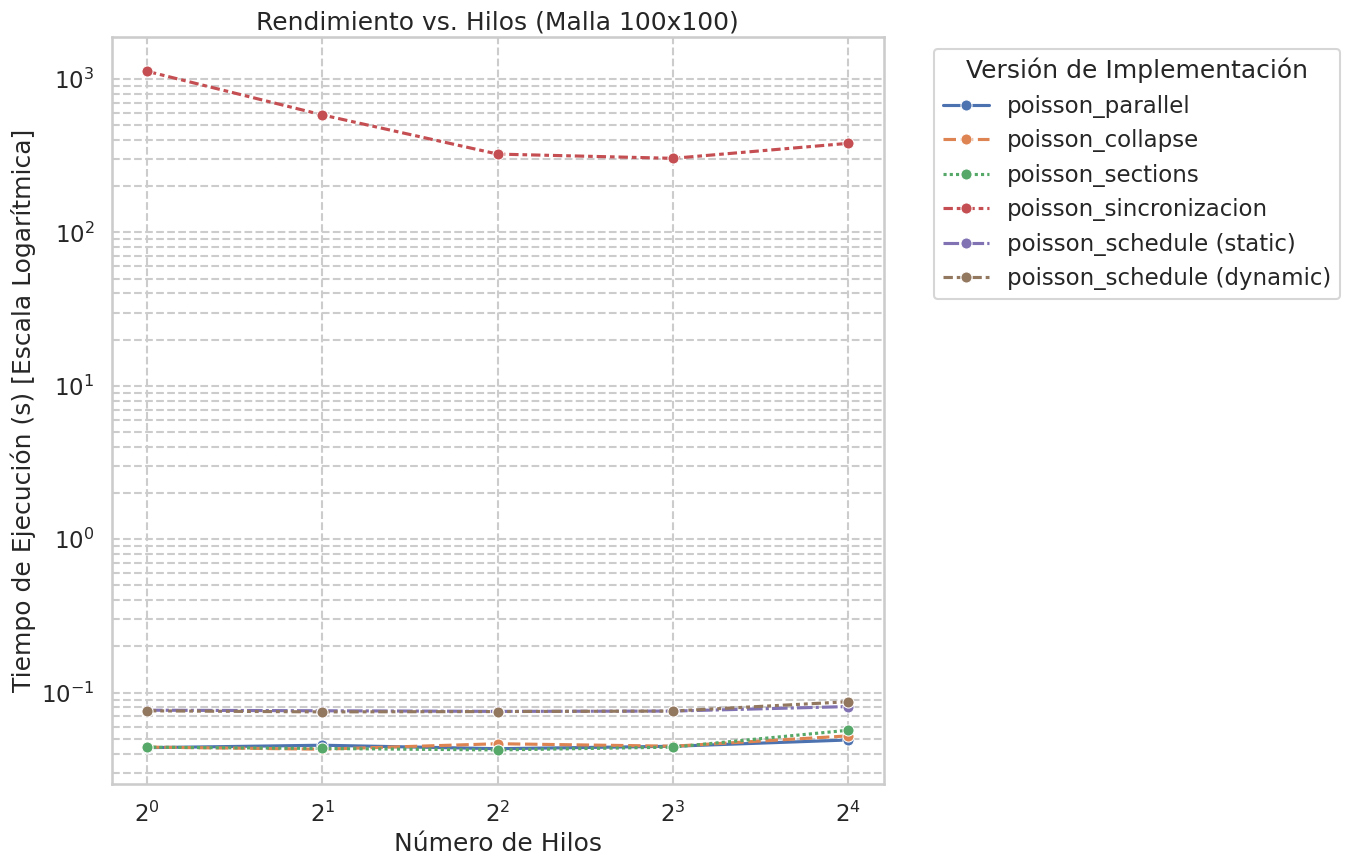

/tmp/ipykernel_4768/550919221.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_malla['etiqueta'] = df_plot_malla['version'] + df_plot_malla['schedule'].apply(lambda x: f' ({x})' if pd.notna(x) else '')


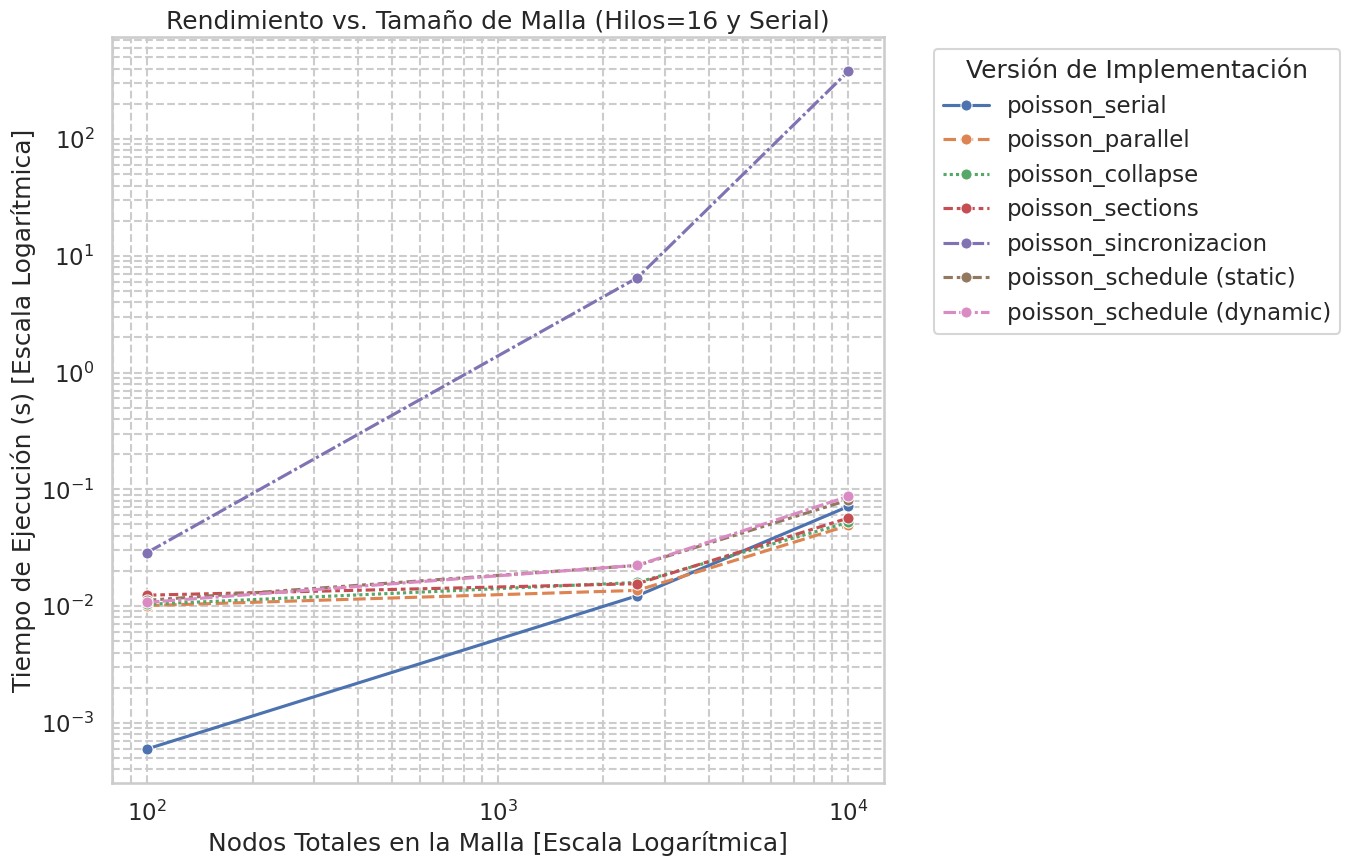

In [20]:
# --- Celda 3: Carga y Gráficas de Rendimiento ---

print("--- GENERANDO GRÁFICAS DE RENDIMIENTO ---")

try:
    df = pd.read_csv(OUTPUT_FILE)
    df['malla_total'] = df['malla_M'] * df['malla_M']
    print(f"Datos cargados con éxito. {len(df)} filas de resultados.")
    
    # Configuración de estilo
    sns.set_theme(style="whitegrid", context="talk")

    # --- 3. GRÁFICA: HILOS vs TIEMPO (Escalabilidad Fuerte) ---
    largest_mesh_m = df['malla_M'].max()
    df_plot = df[(df['malla_M'] == largest_mesh_m) & (df['caso'] == 1)]
    df_plot['etiqueta'] = df_plot['version'] + df_plot['schedule'].apply(lambda x: f' ({x})' if pd.notna(x) else '')
    
    plt.figure(figsize=(14, 9))
    sns.lineplot(data=df_plot[df_plot['version'] != 'poisson_serial'], x='hilos', y='tiempo', hue='etiqueta', style='etiqueta', marker='o', markersize=8)
    plt.title(f'Rendimiento vs. Hilos (Malla {largest_mesh_m}x{largest_mesh_m})')
    plt.xlabel('Número de Hilos')
    plt.ylabel('Tiempo de Ejecución (s) [Escala Logarítmica]')
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xticks(THREAD_COUNTS)
    plt.legend(title='Versión de Implementación', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

    # --- 4. GRÁFICA: MALLA vs TIEMPO (Complejidad) ---
    max_hilos = df['hilos'].max()
    df_plot_malla = df[((df['hilos'] == max_hilos) | (df['version'] == 'poisson_serial')) & (df['caso'] == 1)]
    df_plot_malla['etiqueta'] = df_plot_malla['version'] + df_plot_malla['schedule'].apply(lambda x: f' ({x})' if pd.notna(x) else '')

    plt.figure(figsize=(14, 9))
    sns.lineplot(data=df_plot_malla, x='malla_total', y='tiempo', hue='etiqueta', style='etiqueta', marker='o', markersize=8)
    plt.title(f'Rendimiento vs. Tamaño de Malla (Hilos={max_hilos} y Serial)')
    plt.xlabel('Nodos Totales en la Malla [Escala Logarítmica]')
    plt.ylabel('Tiempo de Ejecución (s) [Escala Logarítmica]')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title='Versión de Implementación', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{OUTPUT_FILE}'. Asegúrate de que la Celda 2 se haya ejecutado correctamente.")

In [9]:
# --- Celda 4: Función de Visualización Universal (con Vista Ajustada) ---

import numpy as np 
print("--- FUNCIÓN DE VISUALIZACIÓN CON VISTA AJUSTADA LISTA ---")

def plot_solution_for_version(version_name, case_id, mesh_size_m, mesh_size_n, threads=8, schedule_type=None):
    """
    Ejecuta una versión específica en modo 'solution', reorganiza los datos en una
    rejilla 2D y grafica el resultado con plot_surface.
    """
    
    sched_name = ""
    if schedule_type:
        sched_name = " (static)" if schedule_type == 1 else " (dynamic)"

    print(f"\nCalculando solución para: '{version_name}{sched_name}' - Caso {case_id}")
    
    cmd = [os.path.join(EXECUTABLE_DIR, version_name), str(mesh_size_m), str(mesh_size_n), str(threads), str(case_id)]
    if schedule_type:
        cmd.append(str(schedule_type))
    cmd.extend(['--mode', 'solution'])
    
    try:
        result = subprocess.run(cmd, capture_output=True, text=True, check=True, timeout=120)
        df_solution = pd.read_csv(io.StringIO(result.stdout))
        
        # Reorganizar datos planos en rejillas 2D
        X = df_solution['x'].values.reshape((mesh_size_n + 1, mesh_size_m + 1))
        Y = df_solution['y'].values.reshape((mesh_size_n + 1, mesh_size_m + 1))
        V_grid = df_solution['V'].values.reshape((mesh_size_n + 1, mesh_size_m + 1))
        
        # Graficar con plot_surface
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        surf = ax.plot_surface(X, Y, V_grid, cmap=cm.viridis, rstride=1, cstride=1,
                               linewidth=0, antialiased=True)
        
        ax.set_title(f'Solución: {version_name}{sched_name} - Caso {case_id}', fontsize=16)
        ax.set_xlabel('x', fontsize=12, labelpad=10)
        ax.set_ylabel('y', fontsize=12, labelpad=10)
        ax.set_zlabel('V(x,y)', fontsize=12, labelpad=10)
        
        # --- ¡AQUÍ ESTÁ EL CAMBIO! ---
        # Ajustamos los ángulos de elevación y azimut para que coincidan con tu ejemplo.
        # Puedes experimentar con estos valores para encontrar tu ángulo preferido.
        # elev=30 (un poco más alto que antes)
        # azim=-60 (rotado para que el eje Y apunte más hacia la derecha)
        ax.view_init(elev=30, azim=-60) 
        
        fig.colorbar(surf, shrink=0.6, aspect=10, label='Potencial V(x,y)')
        plt.show()
        
    except Exception as e:
        print(f"Ocurrió un error al ejecutar o graficar {' '.join(cmd)}: {e}")

--- FUNCIÓN DE VISUALIZACIÓN CON VISTA AJUSTADA LISTA ---


--- GENERANDO GRÁFICAS DE VALIDACIÓN PARA CADA IMPLEMENTACIÓN ---

  VALIDACIÓN VISUAL PARA EL CASO 1

Calculando solución para: 'poisson_serial' - Caso 1


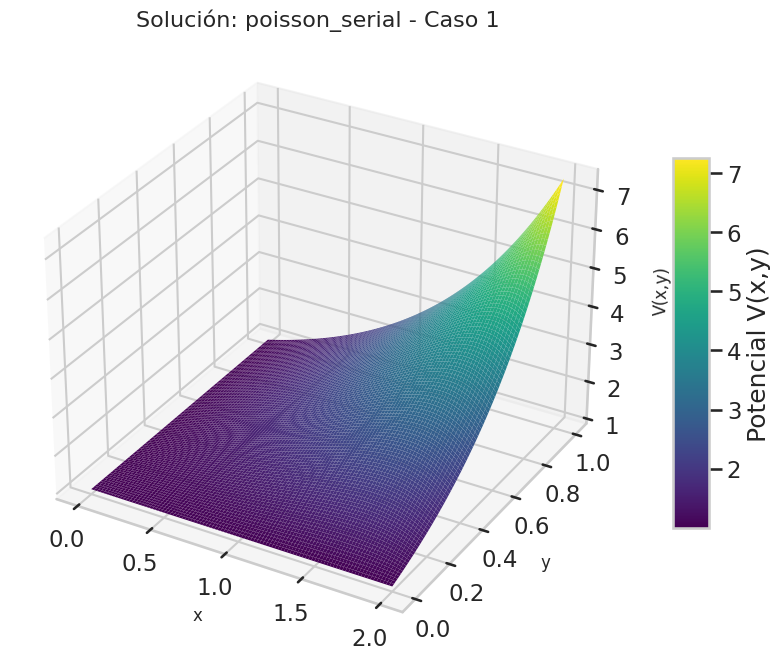


Calculando solución para: 'poisson_parallel' - Caso 1


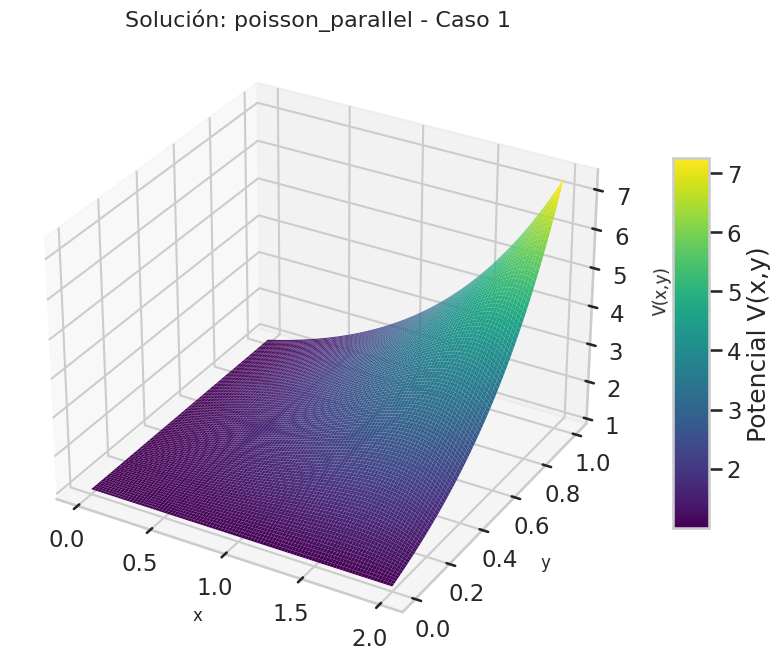


Calculando solución para: 'poisson_collapse' - Caso 1


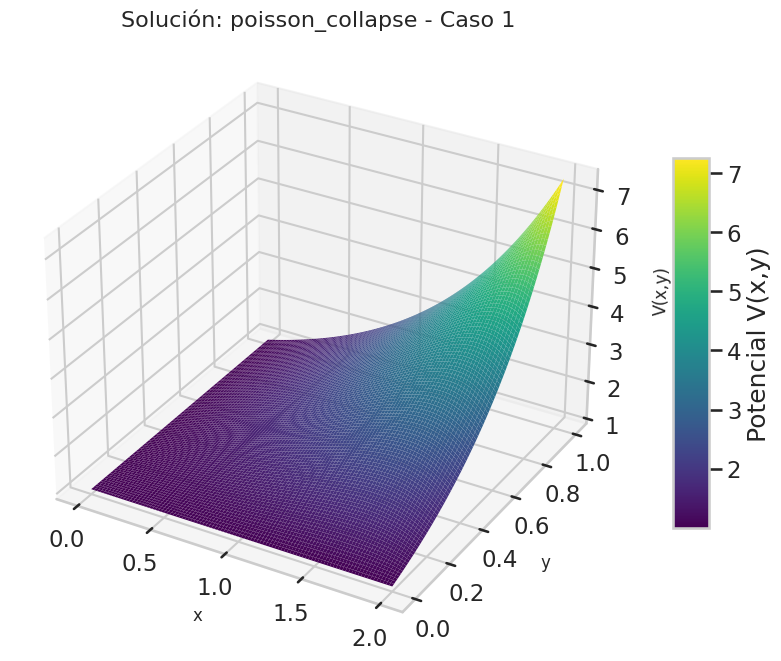


Calculando solución para: 'poisson_sections' - Caso 1


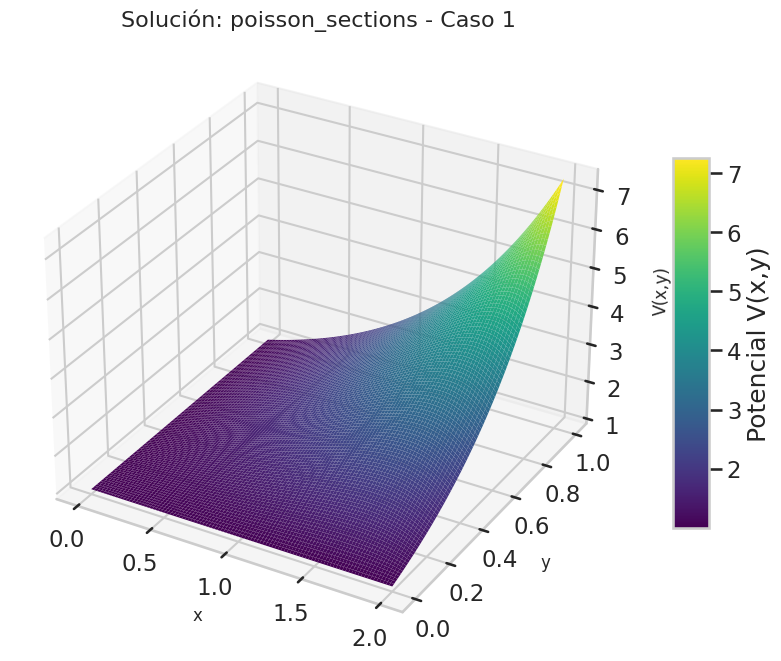


Calculando solución para: 'poisson_sincronizacion' - Caso 1
Ocurrió un error al ejecutar o graficar ./bin/poisson_sincronizacion 100 100 16 1 --mode solution: Command '['./bin/poisson_sincronizacion', '100', '100', '16', '1', '--mode', 'solution']' timed out after 120 seconds

Calculando solución para: 'poisson_schedule (static)' - Caso 1


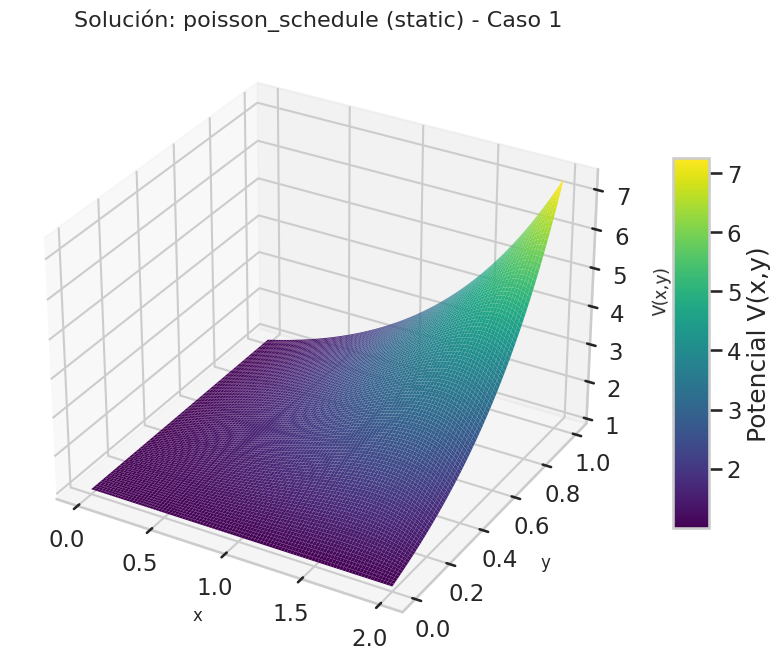


Calculando solución para: 'poisson_schedule (dynamic)' - Caso 1


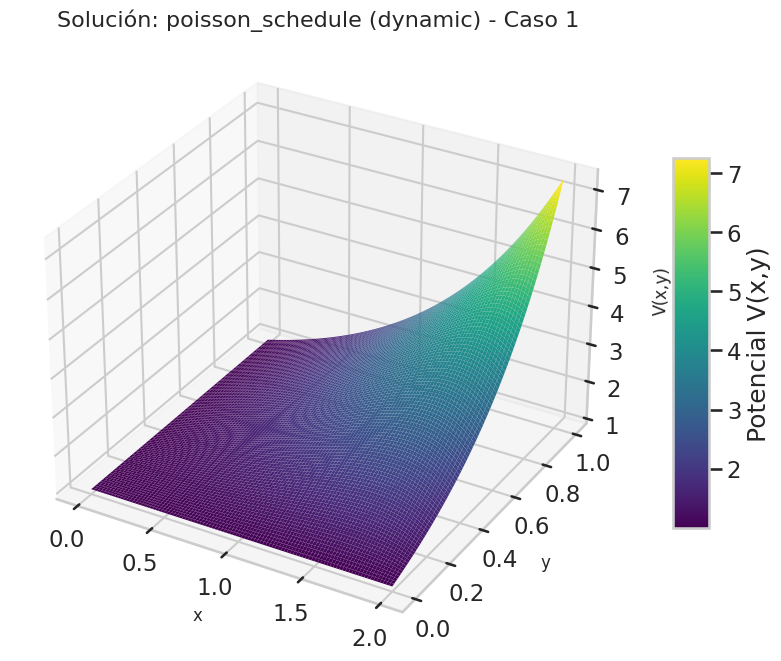


  VALIDACIÓN VISUAL PARA EL CASO 2

Calculando solución para: 'poisson_serial' - Caso 2


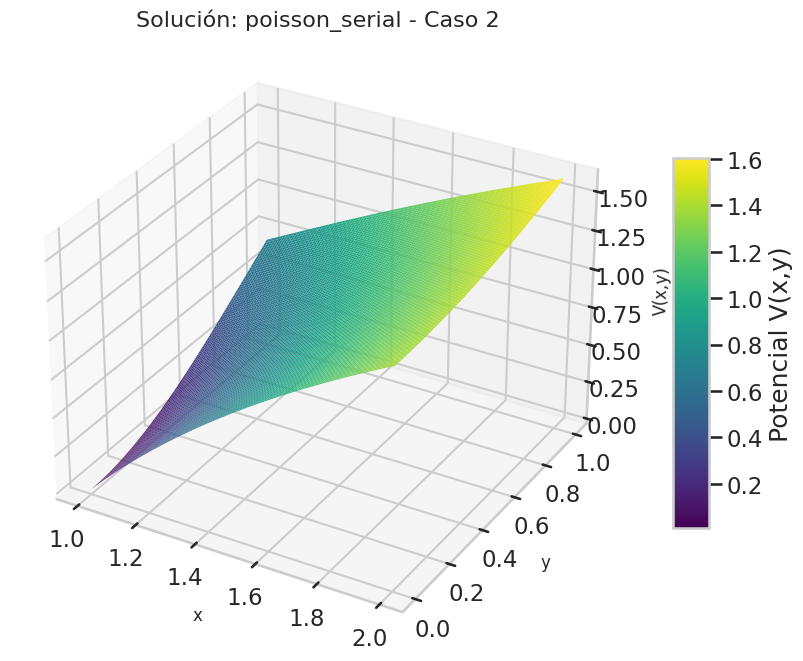


Calculando solución para: 'poisson_parallel' - Caso 2


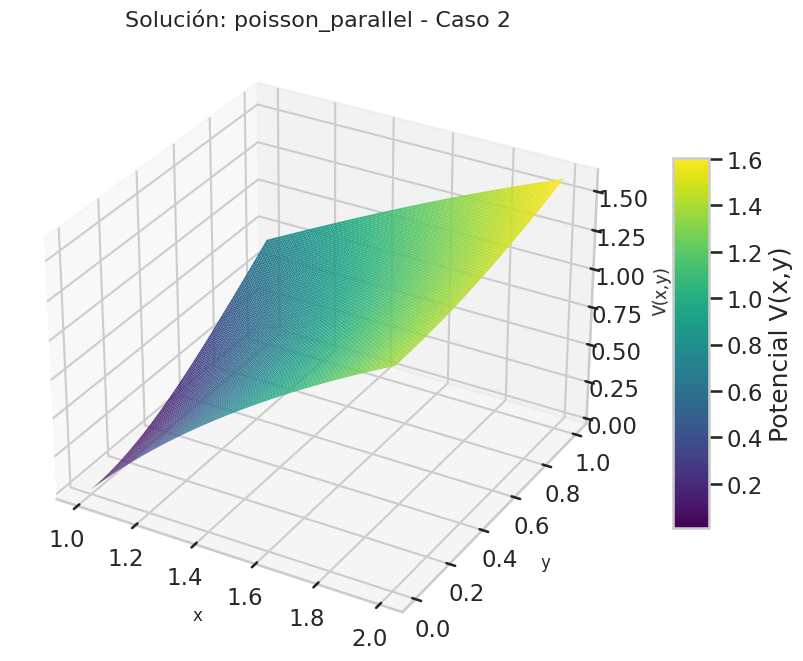


Calculando solución para: 'poisson_collapse' - Caso 2


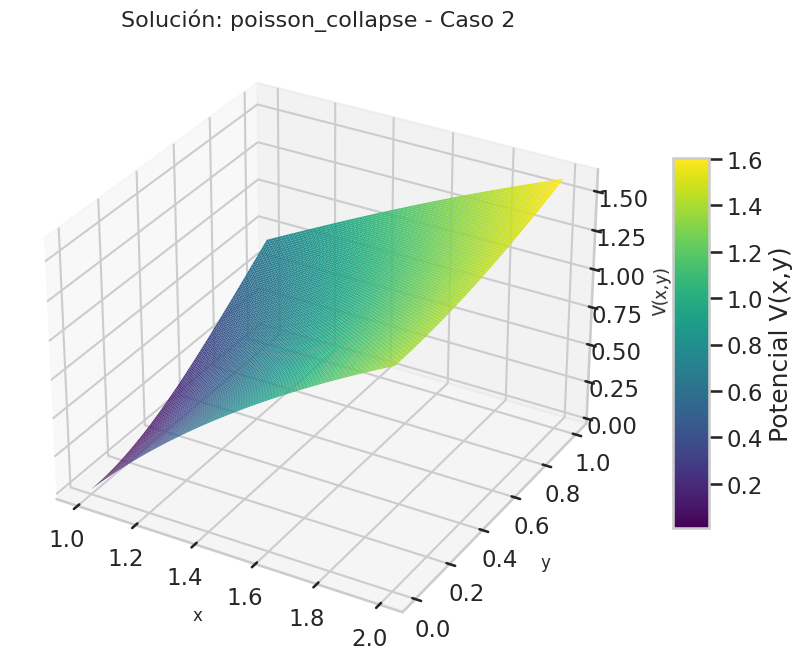


Calculando solución para: 'poisson_sections' - Caso 2


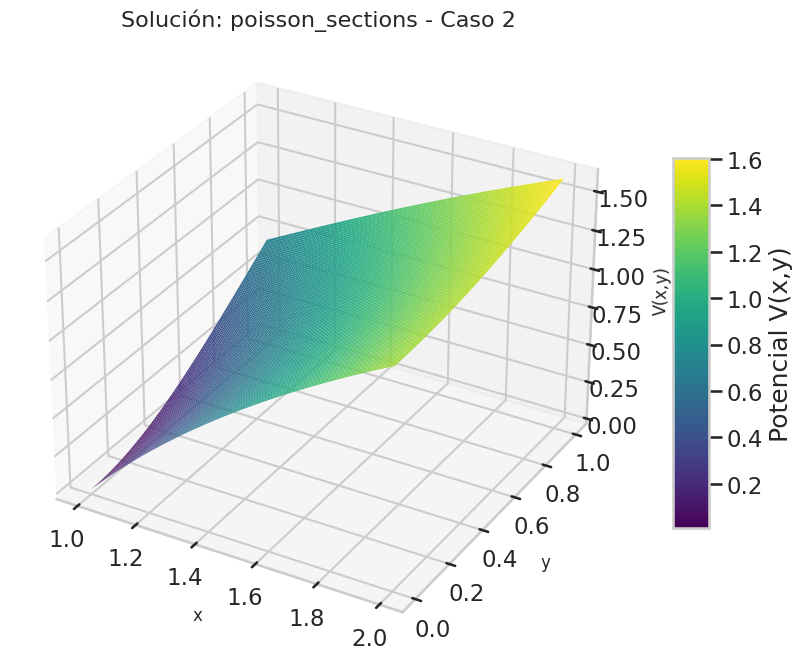


Calculando solución para: 'poisson_sincronizacion' - Caso 2
Ocurrió un error al ejecutar o graficar ./bin/poisson_sincronizacion 100 100 16 2 --mode solution: Command '['./bin/poisson_sincronizacion', '100', '100', '16', '2', '--mode', 'solution']' timed out after 120 seconds

Calculando solución para: 'poisson_schedule (static)' - Caso 2


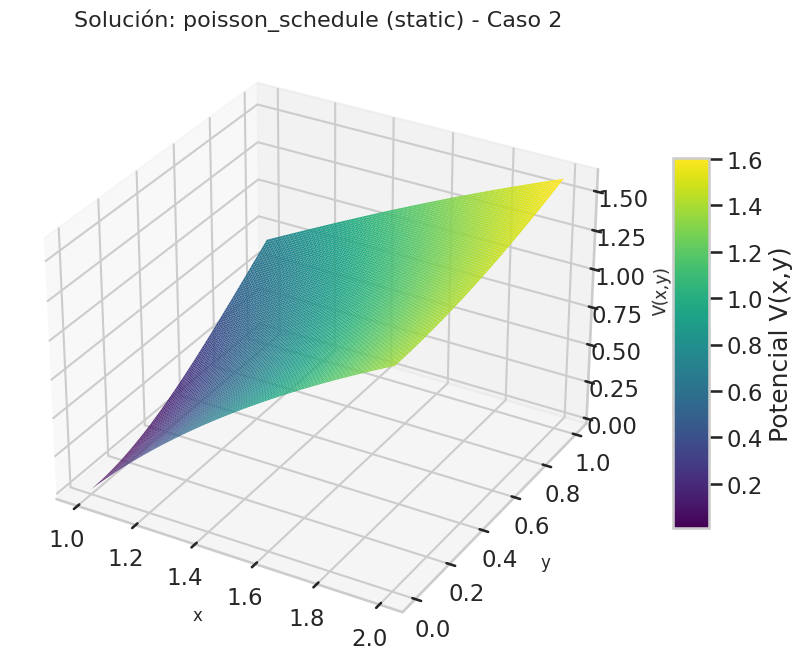


Calculando solución para: 'poisson_schedule (dynamic)' - Caso 2


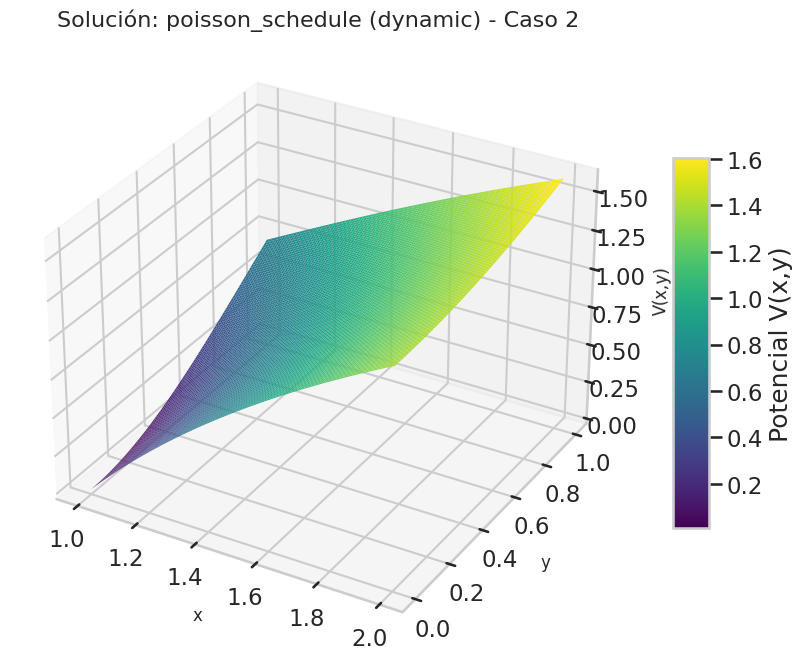

In [10]:
# --- Celda 5: Validación Visual de Todas las Implementaciones ---

print("--- GENERANDO GRÁFICAS DE VALIDACIÓN PARA CADA IMPLEMENTACIÓN ---")

# Usaremos una malla fina para una buena calidad visual.
MESH_VISUALIZACION = 100 
# Usaremos el máximo de hilos para que el cálculo sea rápido.
THREADS_VISUALIZACION = max(THREAD_COUNTS) if THREAD_COUNTS else 1

# Lista completa de todas las versiones a graficar
ALL_VERSIONS_TO_PLOT = [
    "poisson_serial",
    "poisson_parallel",
    "poisson_collapse",
    "poisson_sections",
    "poisson_sincronizacion",
    "poisson_schedule"
]

for case_to_plot in [1, 2]:
    print("\n" + "="*60)
    print(f"  VALIDACIÓN VISUAL PARA EL CASO {case_to_plot}")
    print("="*60)
    
    for version in ALL_VERSIONS_TO_PLOT:
        if version == "poisson_schedule":
            # Para 'schedule', graficamos ambas variantes
            plot_solution_for_version(version, case_id=case_to_plot,
                                      mesh_size_m=MESH_VISUALIZACION, mesh_size_n=MESH_VISUALIZACION,
                                      threads=THREADS_VISUALIZACION, schedule_type=1) # Static
            
            plot_solution_for_version(version, case_id=case_to_plot,
                                      mesh_size_m=MESH_VISUALIZACION, mesh_size_n=MESH_VISUALIZACION,
                                      threads=THREADS_VISUALIZACION, schedule_type=2) # Dynamic
        elif version == "poisson_serial":
            # La versión serial siempre usa 1 hilo
            plot_solution_for_version(version, case_id=case_to_plot,
                                      mesh_size_m=MESH_VISUALIZACION, mesh_size_n=MESH_VISUALIZACION,
                                      threads=1)
        else:
            # El resto de versiones paralelas
            plot_solution_for_version(version, case_id=case_to_plot,
                                      mesh_size_m=MESH_VISUALIZACION, mesh_size_n=MESH_VISUALIZACION,
                                      threads=THREADS_VISUALIZACION)